In [31]:
#latihan mengumpulkan data/data collacting
#DATA LOADING
import pandas as pd
data = pd.read_csv('laptopPrice (1).csv')

#data cleaning
data.head()
#data.info() ini kita gunakan untuk melihat informasi dari dataset kita
data.info()
#menggunakan describe untuk melihat statistik dari dataset kita
data.describe(include='all')
#disni kita memeriksa terhadap data yanng hilang/missing value
data.isnull().sum()
#melihat data duplikat
data.duplicated().sum()
#cek baris mana saja yang duplikat
data[data.duplicated()]
#mengatasi data duplikat
data1 = data.drop_duplicates()
data1.duplicated().sum()


#mengatasi outliers 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

np.int64(0)

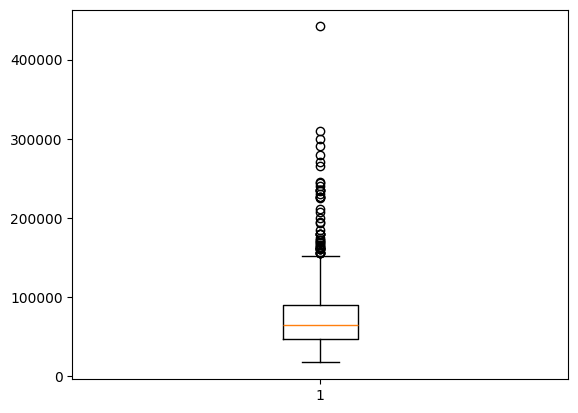

0       34649.0
1       38999.0
2       39999.0
3       69990.0
4       26990.0
         ...   
818    135990.0
819    144990.0
820    149990.0
821    142990.0
822     57490.0
Name: Price, Length: 823, dtype: float64


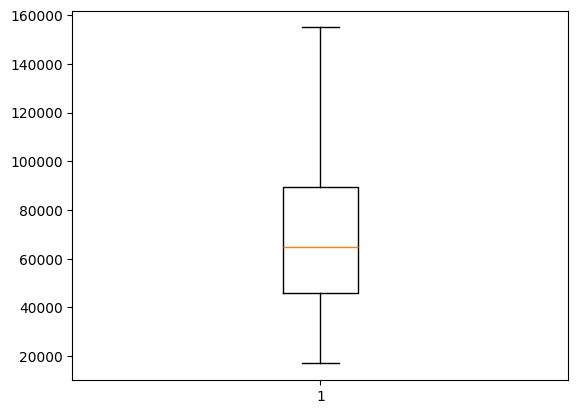

In [32]:
#kita akan melihat outliers pada kolom harga
#KITA AKAN MENGGUNAKAN METODE IQR (INTERQUARTILE RANGE) UNTUK MENDETEKSI OUTLIERS
import matplotlib.pyplot as plt

Q1 = data['Price'].quantile(0.25)#INI ADALAH NILAI PERSENTIL 25 KUARTIL 1 ATAU DATA PALING KECIL 25%
Q3 = data['Price'].quantile(0.75)#INI ADALAH NILAI PERSENTIL 75 KUARTIL 3 ATAU DATA PALING BESAR 25%

IQR = Q3 - Q1

DATA_BAWAH = Q1 - 1.5 * IQR
DATA_ATAS = Q3 + 1.5 * IQR

data_outliers = data[(data['Price'] > DATA_ATAS) | (data['Price'] < DATA_BAWAH)]
data_outliers

plt.boxplot(data['Price'])
plt.show()


#masuk kebagian untuk menggilangkan outliers di dataset kita

Q1 = data['Price'].quantile(0.25)#INI ADALAH NILAI PERSENTIL 25 KUARTIL 1 ATAU DATA PALING KECIL 25%
Q3 = data['Price'].quantile(0.75)#INI ADALAH NILAI PERSENTIL 75 KUARTIL 3 ATAU DATA PALING BESAR 25%

IQR = Q3 - Q1

DATA_BAWAH = Q1 - 1.5 * IQR
DATA_ATAS = Q3 + 1.5 * IQR

data['Price'] = data['Price'].clip(DATA_BAWAH, DATA_ATAS)
print(data['Price'])

#kita validasi apakah outliers sudah hilang atau belum
cek = data[
    (data['Price'] < DATA_BAWAH) | (data['Price'] > DATA_ATAS)
]
cek
plt.boxplot(data['Price'])
plt.show()



In [35]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,73646.840826,315.301337,37.609964
std,34654.867285,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,154947.500000,15279.000000,1947.000000
